Author: Keita Watanabe

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
%matplotlib inline
mpl.rcParams["font.size"] = 16

# Chapter1: Rosenblatt's Perceptron

Figures without citation are taken from Haykin's book

The perceptron is a single layer neural network.

![Signal-flow](./figs/1_1.png)

* $w_1, w_2, \dots, w_m$: synaptic weights
* $x_1, x_2, \dots, x_m$: inputs applied to the perceptron
* $b$: bias
$$
v = \sum_{i=1}^m w_i x_i + b
$$

![hyperplane](figs/1_2.png)

* $\mathbf{w} = [b, w_1(n), w_2(n), \dots, w_m(n)]^T$: synaptic weights + bias
* $\mathbf{x} = [+1, x_1(n), x_2(n), \dots, x_m(n)]^T$: inputs applied to the perceptron
* $b$: bias
$$
v(n) = \sum_{i=0}^m w_i(n) x_i(n) = \mathbf{w}^T(n) \mathbf{x}(n)
$$
Note that $w_0(n) = b$ and $x_0(n) = +1$.

## Objection
$\mathscr{C}_1, \mathscr{C}_2$
* $\mathbf{w}^T\mathbf{x} > 0$ for every input vector $\mathbf{x}$ belonging to class $\mathscr{C}_1$
* $\mathbf{w}^T\mathbf{x} \leq 0$ for every input vector $\mathbf{x}$ belonging to class $\mathscr{C}_2$

You need to understand the relationship between normal vector (法線ベクトル) and a plane. [For people who forget vector calculus.](http://mathworld.wolfram.com/NormalVector.html)

## Learning algorithm
## Proof of the perceptron convergence algorithm
Mathematical derivation on whiteboard!

![Perceptron convergence Algorithm](figs/tab1_1.png)

## Illustration of learning algorithm

Let $\mathbf{w}(n)$ and $\mathbf{x}(n)$ as follows

In [8]:
w = np.zeros(3).reshape(3, 1)
w[0] = 4; w[1] = 3; w[2] = 1
x = np.zeros(3).reshape(3, 1)
x[0] = 1; x[1] = -3; x[2] = 1

In [5]:
print(x, "\n", w, "\n", x+w)

[[ 1.]
 [-3.]
 [ 1.]] 
 [[ 4.]
 [ 3.]
 [ 1.]] 
 [[ 5.]
 [ 0.]
 [ 2.]]


Each vector and decision boundary can be illustrated like this

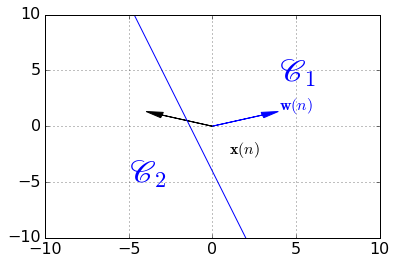

In [21]:
lim = 10
xs = np.linspace(-lim, lim, 100)
a = -w[1] / w[2]
b = -w[0] / w[2]
ys = a * xs + b
ax = plt.axes()
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))
ax.grid(True)
ax.arrow(0, 0, w[1][0], w[2][0], head_width=0.5, head_length=1, fc='b', ec='b')
ax.annotate("$\mathbf{w}(n)$", xy=(w[1][0]+1, w[2][0]+0.5), color="b")
ax.annotate("$\mathscr{C}_1$", xy=(+4, +4), color="b", fontsize=32)
ax.annotate("$\mathscr{C}_2$", xy=(-5, -5), color="b", fontsize=32)
ax.arrow(0, 0, x[1][0], x[2][0], head_width=0.5, head_length=1, fc='k', ec='k')
ax.annotate("$\mathbf{x}(n)$", xy=(x[1][0]+4, x[2][0]-3.5), color="k")
#ax.legend()
ax.plot(xs, ys, color="b")

Let's assume $\mathbf{x} \in \mathscr{C}_2$.
According to the learning algorithm $\mathbf{w}(n+1)$ is

In [18]:
wnew = w + x

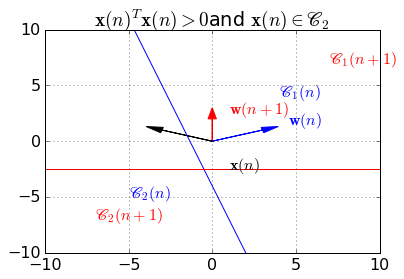

In [25]:
lim = 10
ax = plt.axes()
xs = np.linspace(-lim, lim, 100)
a = -w[1] / w[2]
b = -w[0] / w[2]
ys = a * xs + b
ax.plot(xs, ys, color="b")
a = -wnew[1] / wnew[2]
b = -wnew[0] / wnew[2]
ys = a * xs + b
ax.plot(xs, ys, color="r")
ax.set_xlim((-lim, lim))
ax.set_ylim((-lim, lim))
ax.grid(True)
ax.arrow(0, 0, w[1][0], w[2][0], head_width=0.5, head_length=1, fc='b', ec='b')
ax.annotate("$\mathbf{w}(n)$", xy=(w[1][0]+1.5, w[2][0]+0.5), color="b")
ax.arrow(0, 0, wnew[1][0], wnew[2][0], head_width=0.5, head_length=1, fc='r', ec='r')
ax.annotate("$\mathbf{w}(n+1)$", xy=(wnew[1][0]+1, wnew[2][0]+0.5), color="r")
ax.annotate("$\mathscr{C}_1(n)$", xy=(+4, +4), color="b", fontsize=16)
ax.annotate("$\mathscr{C}_2(n)$", xy=(-5, -5), color="b", fontsize=16)
ax.annotate("$\mathscr{C}_1(n+1)$", xy=(+7, +7), color="r", fontsize=16)
ax.annotate("$\mathscr{C}_2(n+1)$", xy=(-7, -7), color="r", fontsize=16)

ax.arrow(0, 0, x[1][0], x[2][0], head_width=0.5, head_length=1, fc='k', ec='k')
ax.annotate("$\mathbf{x}(n)$", xy=(x[1][0]+4, x[2][0]-3.5), color="k")
ax.set_title("$\mathbf{x}(n)^T\mathbf{x}(n) > 0 $and $\mathbf{x}(n) \in \mathscr{C}_2$")
#ax.legend()

Note that $\mathbf{x}(n)$ is in $\mathscr{C}_2$ when we draw decision boundary with $\mathbf{w}(n+1)$

## Inplementation of the above procedures

## Perceptron inplementation in scikit-learn

Below example is retrieved from [here](http://stamfordresearch.com/scikit-learn-perceptron/) but modified.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
from itertools import cycle
# Needed to show the plots inline
%matplotlib inline

In [27]:
def myperceptron(X, D, max_iter=100):
    """
    input:
    X: data. n rows(number of data points) and m+1 columns(features)
    D: desired responses(labels). n rows
    output:
    w: (m+1) rows learned weights of a separatorixs
    note that in this function, learning rate $\mu$ is fixed to 1
    """
    # add a column for bias parameter
    X = np.c_[np.ones(X.shape[0]), X]
    n, m = X.shape
    w = np.zeros((m, 1)) 
    iter_ = cycle(zip(X, D))
    num_iter = 0
    for x, d in iter_:
        y = np.sign(np.dot(w.T, x))
        w += (d - y)*x.reshape((m, 1))
        num_iter += 1
        if num_iter == max_iter:
            break
    return w

In [28]:
X = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
]).T
# Labels
D = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]).T

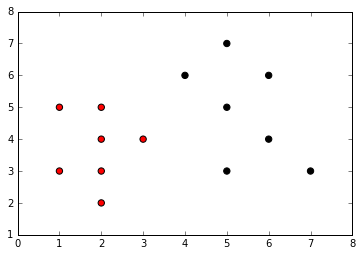

In [29]:
colormap = np.array(['r', 'k'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[D[:]], s=40)

In [30]:
w = myperceptron(X, D, max_iter=100000)
print("w:\n", w)

w:
 [[-29.]
 [  6.]
 [  2.]]


Illustrate the line $y = ax +b$ from the result.

In [31]:
a = -w[1] / w[2]
b = -w[0] / w[2]
xs = np.linspace(X[:, 0].min()-0.5, X[:, 1].max()+0.5)
ys = a * xs + b

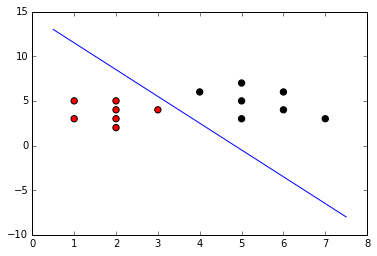

In [32]:
colormap = np.array(['r', 'k'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[D[:]], s=40)
plt.plot(xs, ys)

## Perceptron in sklearn
note: learning algorithm in sklearn's perceptron is stochastic gradient descent

In [33]:
# Create the model
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(X,D)
# Print the results
print("Prediction " + str(net.predict(X)))
print("Actual     " + str(D))
print("Accuracy   " + str(net.score(X, D)*100) + "%")

Prediction [0 0 0 1 1 0 0 1 0 0 1 1 1 1]
Actual     [0 0 0 1 1 0 0 1 0 0 1 1 1 1]
Accuracy   100.0%


Coefficient 0 0.034
Coefficient 1 -0.014
Bias [-0.048]


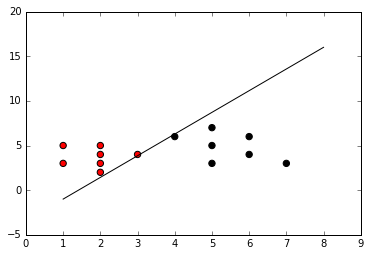

In [34]:
# Plot the original data
plt.scatter(X[:, 0], X[:, 1], c=colormap[D[:]], s=40)
 
# Output the values
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
b = - (net.intercept_[0]) / w[1]
xs = np.linspace(ymin, ymax)
ys = a * xs - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(xs,ys, 'k-')

# Double moon datasets: linearly separable

In [42]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
moons, labels = datasets.make_moons(n_samples=n_samples, noise=0.01)
# make lineary separable moons
separable_moons = moons.copy()
separable_moons[labels == 0, 1] += 1

In [43]:
separable_moons

array([[ 0.48336005, -0.37108666],
       [ 0.01626948,  0.21017081],
       [ 0.7141689 , -0.44264294],
       ..., 
       [ 0.29809425, -0.19753257],
       [ 0.98542766,  1.15462164],
       [ 1.34883898, -0.44141589]])

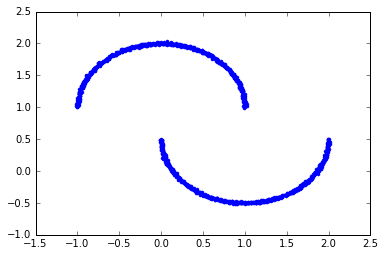

In [44]:
plt.ylim((-1, 2.5))
plt.plot(separable_moons[:, 0], separable_moons[:, 1], "b.")

In [45]:
# Create the model
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(separable_moons,labels)
# Print the results
print("Prediction " + str(net.predict(separable_moons)))
print("Actual     " + str(separable_moons))
print("Accuracy   " + str(net.score(separable_moons, labels)*100) + "%")

Prediction [1 1 1 ..., 1 0 1]
Actual     [[ 0.48336005 -0.37108666]
 [ 0.01626948  0.21017081]
 [ 0.7141689  -0.44264294]
 ..., 
 [ 0.29809425 -0.19753257]
 [ 0.98542766  1.15462164]
 [ 1.34883898 -0.44141589]]
Accuracy   100.0%


Coefficient 0 0.00283610216063
Coefficient 1 -0.00706314695129
Bias [ 0.004]


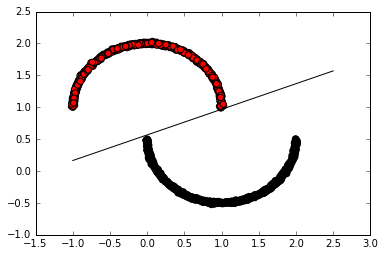

In [46]:
# Plot the original data
plt.scatter(separable_moons[:, 0], separable_moons[:, 1], c=colormap[labels[:]], s=40)
 
# Output the values
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
b = - (net.intercept_[0]) / w[1]
xs = np.linspace(ymin, ymax)
ys = a * xs - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(xs,ys, 'k-')

# Double moon datasets: linearly un-separable

In [50]:
# Create the model
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(moons,labels)
# Print the results
print("Prediction " + str(net.predict(moons)))
print("Actual     " + str(moons))
print("Accuracy   " + str(net.score(moons, labels)*100) + "%")

Prediction [1 1 1 ..., 1 1 1]
Actual     [[ 0.48336005 -0.37108666]
 [ 0.01626948  0.21017081]
 [ 0.7141689  -0.44264294]
 ..., 
 [ 0.29809425 -0.19753257]
 [ 0.98542766  0.15462164]
 [ 1.34883898 -0.44141589]]
Accuracy   87.4%


Coefficient 0 0.000981604222016
Coefficient 1 -0.00750604971557
Bias [ 0.002]


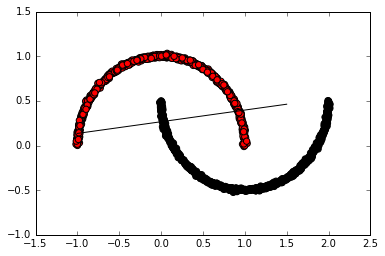

In [51]:
# Plot the original data
plt.scatter(moons[:, 0], moons[:, 1], c=colormap[labels[:]], s=40)
 
# Output the values
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
b = - (net.intercept_[0]) / w[1]
xs = np.linspace(ymin, ymax)
ys = a * xs - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(xs,ys, 'k-')

# Bayes Classifier

Below example is taken from PRML 1.5 Decision Theory, but  I changed some notations...

* $\mathbf{x}$: X-ray image of a patient
* If $\mathbf{x} \in \mathscr{H}_1$ then the patient has cancer, otherwise ($\mathbf{x} \in \mathscr{H}_2$) does not have cancer.
* Suppose our classifier put $\mathbf{x}$ into class $\mathscr{C_1}$, that means the classifier consider the patient has cancer.($\mathscr{C_2}$ indicates the absence of cancer).

The probability of misclassification is 
$$
p(\mathrm{mistake}) = p(\mathbf{x}\in\mathscr{H}_1, \mathscr{C}_2) + p(\mathbf{x}\in\mathscr{H}_2, \mathscr{C}_1) \\
= \int_{\mathscr{H}_1} p(\mathbf{x}, \mathscr{C}_2) d \mathbf{x} + \int_{\mathscr{H}_2} p(\mathbf{x}, \mathscr{C}_1) d \mathbf{x} \\
= \int_{\mathscr{H}_1} p(\mathbf{x}| \mathscr{C}_2)p(\mathscr{C}_2) d \mathbf{x} + \int_{\mathscr{H}_2} p(\mathbf{x}| \mathscr{C}_1)p(\mathscr{C}_1) d \mathbf{x}
$$

Likewise, the probability of correct classification is 
$$
p(\mathrm{correct}) = p(\mathbf{x}\in\mathscr{H}_1, \mathscr{C}_1) + p(\mathbf{x}\in\mathscr{H}_2, \mathscr{C}_2) \\
= \int_{\mathscr{H}_1} p(\mathbf{x}, \mathscr{C}_1) d \mathbf{x} + \int_{\mathscr{H}_2} p(\mathbf{x}, \mathscr{C}_2) d \mathbf{x} \\
= \int_{\mathscr{H}_1} p(\mathbf{x}| \mathscr{C}_1)p(\mathscr{C}_1) d \mathbf{x} + \int_{\mathscr{H}_2} p(\mathbf{x}| \mathscr{C}_2)p(\mathscr{C}_2) d \mathbf{x}
$$

Let $c_{ij}$ is a cost that the classifier assign $\mathbf{x} \in \mathscr{H}_j$ into class $\mathscr{C}_i$, we have the average **risk function $\mathscr{R}$** as follows:

$$
  \mathscr{R} = c_{11} \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1)d\mathbf{x} 
  + c_{22} \int_{\mathscr{H_2}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)d\mathbf{x} \\
  + c_{21} \int_{\mathscr{H_2}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1)d\mathbf{x}
  + c_{12} \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)d\mathbf{x}
$$

The costs $c_{ij}$ can be viewed as the $i,j$ element of a loss matrix such as the one shown in below (the figure retrieved from PRML p41)

<img  src="Pattern-Recognition-and-Machine-Learning-Christophe-M-Bishop_pdf（60_749ページ）.png"/>

In the textbook, $p(\mathscr{C}_i) = p_i$

$$
  \mathscr{R} = c_{11}p_1 \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)d\mathbf{x} 
  + c_{22}p_2 \int_{\mathscr{H_2}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)d\mathbf{x} \\
  + c_{21}p_1 \int_{\mathscr{H_2}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)d\mathbf{x}
  + c_{12}p_2 \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)d\mathbf{x}
$$

But I don't use this notation anymore...

As $\mathscr{H} = \mathscr{H}_1 + \mathscr{H}_2$, we may rewrite the equation to the equivalent form:

$$
  \mathscr{R} = c_{11} \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1)d\mathbf{x} 
  + c_{22} \int_{\mathscr{H}-\mathscr{H}_1}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)d\mathbf{x} \\
  + c_{21} \int_{\mathscr{H}-\mathscr{H}_1}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1)d\mathbf{x}
  + c_{12} \int_{\mathscr{H_1}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)d\mathbf{x}
$$

As $\int_{\mathscr{H}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)d\mathbf{x}=\int_{\mathscr{H}}p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)d\mathbf{x} = 1$, the above equation reduced to

$$
  \mathscr{R} = c_{21}p(\mathscr{C}_1) + c_{22}p(\mathscr{C}_2)  \\
  + \int_{\mathscr{H_1}}[
  (c_{12} - c_{22}) p_{\mathbf{x}}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)
  -   (c_{21} - c_{11}) p_{\mathbf{x}}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1)
  ]d\mathbf{x} 
$$

In the condition 
$$
(c_{21} - c_{11})p_\mathbf{x}(\mathbf{x}|\mathscr{C}_1)p(\mathscr{C}_1) > 
(c_{12} - c_{22})p_\mathbf{x}(\mathbf{x}|\mathscr{C}_2)p(\mathscr{C}_2)
$$
or equivalently,
$$
(c_{21} - c_{11})p_\mathbf{x}(\mathscr{C}_1|\mathbf{x}) > 
(c_{12} - c_{22})p_\mathbf{x}(\mathscr{C}_2|\mathbf{x})
$$


holds, assign the observation vector $\mathbf{x}$ to subspace $\mathscr{H}_1$ (i.e. class $\mathscr{C}_1$)

To simplify matters, define
$$
\Lambda(\mathbf{x}) = \frac{p_{\mathbf{x}}(\mathbf{x}|\mathscr{C}_1)}{p_{\mathbf{x}}(\mathbf{x}|\mathscr{C}_2)}
$$
and
$$
\xi  = \frac{p(\mathscr{C}_2)(c_{12}-c_{22})}{p(\mathscr{C}_1)(c_{21}-c_{11})}
$$

# Bayes Classifier for a Gaussian Distribution

Suppose the data satisfy the following statements

<img  src="Haykin09_pdf（89_938ページ）.png"/>

Then we can express the conditional probability density function as the multivariate Gaussian distribution

<img  src="Haykin09_pdf（89_938ページ）.png"/>

Add more assumptions:
* $p(\mathscr{C}_1) = p(\mathscr{C}) = 1/2$ 
* $c_{21}=c_{12}\ \text{and}\ c_{11}=c_{22}=0\quad (\text{no cost for correct decision})$

We get

<img  src="Haykin09_pdf（90_938ページ）.png"/>

and

<img  src="Haykin09_pdf（90_938ページ）.png"/>

If $\mathrm{y}$ is positive, assign the observation $\mathbf{x}$ to class $\mathscr{C}_1$ otherwise $\mathscr{C}_2$. It's analogous to our two-class perceptron.

# Batch perceptron algorithm

The perceptorn cost function is
$$
J(\mathbf{w}) = \sum_{\mathbf{x(n)} \in \mathscr{R}} (-\mathbf{w}^T \mathbf{x}(n)d(n))
$$
$\mathscr{R}$ is the set of misclassified samples.
Learning algorithm of the batch perceptorn is

<img  src="Haykin09_pdf（96_938ページ）.png"/>

# Generative model vs discriminative model
* Directory model $p(\mathscr{C}_k|\mathbf{x})$ ⇒ discriminative model
* First model $p(\mathbf{x}|\mathscr{C}_k)$ and $p(\mathscr{C}_k)$. Compute $$
p(\mathscr{C}_k|\mathbf{x}) = \frac{p(\mathbf{x}|\mathscr{C}_k)p(\mathscr{C}_k)}{p(\mathbf{x})}
$$ ⇒ generative model

note that 
$$
p(\mathbf{x}) = \sum_{k} p(\mathbf{x}|\mathscr{C}_k)p(\mathscr{C}_k)
$$

# Naive Bayes